# pybvh tutorial

## Bvh object

We will first load the library and create an object to see what is inside

In [1]:
import pybvh

bvhtest = pybvh.Bvh()
bvhtest

Bvh(nodes=[ROOT root], frames=array(shape=(1, 0), dtype=float64), frame_frequency=0.000000)

As can be seen, the 3 important parameters of a Bvh object are the followings: 

- nodes is a list of node object, either BvhNode for end site, BvhRoot for the root joint, or BvhJoint for the rest of the joints. It contains the bvh Hierarchy.
- frames is a 2D numpy array. Each line is a frame of the bvh animation. Each column is the rotational data for one axe of the euler angle of a given joint. This frames array is identical to the frame part of a bvh file.
- Finally the frame frequency tells us how fast the frames succeed each other, given by 1 / frames per second

### Loading a bvh file into a Bvh object

To better understand those parameters, let us load a bvh file into a bvh object.

In [2]:
from pathlib import Path

bvh_folder = Path('.')

filepath1 = bvh_folder / 'bvh_test1.bvh'
#filepath2 = bvh_folder / 'bvh_test2.bvh'

In [3]:
bvhtest = pybvh.read_bvh_file(filepath1)
bvhtest

Bvh(nodes=[ROOT Hips, Spine, Spine1, Spine2, Spine3, Neck, Neck1, Head, RightShoulder, RightArm, RightForeArm, RightHand, LeftShoulder, LeftArm, LeftForeArm, LeftHand, RightUpLeg, RightLeg, RightFoot, RightToeBase, LeftUpLeg, LeftLeg, LeftFoot, LeftToeBase], frames=array(shape=(56, 75), dtype=float64), frame_frequency=0.008333)

We can see from this example the basic description of our skeleton, and that it has a total of 24 joints. The array contains 56 frames information. If you are wondering why we have 75 columns in the array instead of 72 (24joints*3angles), it is because the first 3 columns are the root position in the space, which add 3 columns, hence 75. Those frames are filmed at a rate of 1/0.00833 = 120 frames per second. Let us take a closer look at the hierarchy.

### Bvh nodes

In [4]:
bvhtest.nodes[0:9]

[BvhRoot(name = Hips, offset = [0. 0. 0.], pos_channels = ['X', 'Y', 'Z'], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine)', 'BvhJoint(JOINT RightUpLeg)', 'BvhJoint(JOINT LeftUpLeg)'], parent = None),
 BvhJoint(name = Spine, offset = [-0.00000e+00  4.11045e+00  1.10000e-05], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine1)'], parent = ROOT Hips),
 BvhJoint(name = Spine1, offset = [ 2.000000e-06  4.048012e+00 -7.137590e-01], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine2)'], parent = JOINT Spine),
 BvhJoint(name = Spine2, offset = [ 1.00000e-06  4.09481e+00 -3.58239e-01], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine3)'], parent = JOINT Spine1),
 BvhJoint(name = Spine3, offset = [-0.00000e+00  4.11045e+00  1.10000e-05], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Neck)', 'BvhJoint(JOINT RightShoulder)', 'BvhJoint(JOINT LeftShoulder)'], parent = JOINT Spine2),
 BvhJoint(name = Neck, offset = [-1

Each element of this list is either
- a BvhRoot, only one, the root of the file; it is always the first element
- a BvhJoint, for all the actual joint other than the root
- a BvhNode, for the end point of some joints (the head in this example).



#### BvhNode

In [5]:
bvhtest.nodes[8]

BvhNode(name = End Site Head, offset = [-0.00000e+00  3.40905e+00  9.00000e-06], parent = JOINT Head)

A BvhNode only consists of the name, an offset value and a pointer to its parent node in the nodes list. The offset value is alway [X, Y, Z]. It is normally used for the End site of the bvh files. If it is an End Site, it will alway say so in its name.|

The parent directly links to the actual object, which allow chaining operation:

In [6]:
bvhtest.nodes[8].parent.name

'Head'

#### BvhJoint

In [7]:
bvhtest.nodes[2]

BvhJoint(name = Spine1, offset = [ 2.000000e-06  4.048012e+00 -7.137590e-01], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine2)'], parent = JOINT Spine)

The BvhJoint inherits from the BvhNode class. In addition to the name, offset and parent parameters, it also has a rot_channels parameters. It indicates the Euler angle rotation order for this joint. It finally has a children parameter, which is a list of pointers to it children objects in the nodes list. Same as the parent, this allows acces to the object themselves.

In [8]:
print(bvhtest.nodes[2].children[0].name, bvhtest.nodes[2].children[0].offset)

Spine2 [ 1.00000e-06  4.09481e+00 -3.58239e-01]


#### BvhRoot

In [9]:
bvhtest.nodes[0]

BvhRoot(name = Hips, offset = [0. 0. 0.], pos_channels = ['X', 'Y', 'Z'], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine)', 'BvhJoint(JOINT RightUpLeg)', 'BvhJoint(JOINT LeftUpLeg)'], parent = None)

The BvhRoot class inherits from the BvhJoint class. In addition to the previous parameters, it also defines a pos_channels parameters which tells us the order of the cartesian coordinate of the hips as they appear in the frames. This parameter can also be directly accessed through the parameter root.

In [10]:
bvhtest.root

BvhRoot(name = Hips, offset = [0. 0. 0.], pos_channels = ['X', 'Y', 'Z'], rot_channels = ['Z', 'Y', 'X'], children = ['BvhJoint(JOINT Spine)', 'BvhJoint(JOINT RightUpLeg)', 'BvhJoint(JOINT LeftUpLeg)'], parent = None)

### Frames

The other very important parameter is the actual rotational data of each frames, given by a 2D numpy array. 

In [11]:
bvhtest.frames

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  1.700000e-05,
        -2.000000e-06,  6.800499e+00],
       [ 1.020000e-02, -3.020000e-04,  4.990000e-04, ...,  1.700000e-05,
        -2.000000e-06,  6.827902e+00],
       [ 2.000000e-02, -1.000000e-03,  8.000000e-04, ...,  1.900000e-05,
        -2.000000e-06,  6.827901e+00],
       ...,
       [ 6.815990e-01, -4.340000e-02, -8.499000e-03, ...,  1.800000e-05,
        -2.000000e-06,  6.954298e+00],
       [ 6.927000e-01, -4.399900e-02, -7.499000e-03, ...,  1.800000e-05,
        -3.000000e-06,  6.964500e+00],
       [ 7.033000e-01, -4.470100e-02, -6.199000e-03, ...,  1.700000e-05,
        -2.000000e-06,  6.976403e+00]])

Since the relationship between column and joints/ax is not immediately apparent, we can get the parameter frame_template to help us with that

In [12]:
column_num = 8
print(f'the rotational data time series for {bvhtest.frame_template[column_num]} is given by the 1D array \n{bvhtest.frames[:,column_num]}')

the rotational data time series for Spine_X_rot is given by the 1D array 
[ 0.452089  0.439445  0.427663  0.41587   0.410912  0.401161  0.38933
  0.380368  0.37212   0.360267  0.35022   0.340748  0.334433  0.326398
  0.314985  0.303932  0.293721  0.285515  0.276949  0.268871  0.260183
  0.249918  0.234962  0.224661  0.218543  0.210785  0.203219  0.198842
  0.196693  0.187543  0.176877  0.167095  0.159633  0.142229  0.124546
  0.114552  0.102342  0.087777  0.067492  0.053082  0.04199   0.028276
  0.014381 -0.001682 -0.014426 -0.025318 -0.035848 -0.051094 -0.062776
 -0.076651 -0.088931 -0.104914 -0.116692 -0.130189 -0.137441 -0.148129]


## Bvh and DataFrame

### Bvh to DataFrame

Since this is stil not easy to see, we can use the pandas library to transform our 2D array into a DataFrame object. We use the method get_df_constructor() from the bvh object to facilitate this conversion. This conversion will also automatically add a time data at the front of the Dataframe.

In [13]:
import pandas as pd

df = pd.DataFrame(bvhtest.get_df_constructor())
df.head()

,time,Hips_X_pos,Hips_Y_pos,Hips_Z_pos,Hips_Z_rot,Hips_Y_rot,Hips_X_rot,Spine_Z_rot,Spine_Y_rot,Spine_X_rot,...,LeftUpLeg_X_rot,LeftLeg_Z_rot,LeftLeg_Y_rot,LeftLeg_X_rot,LeftFoot_Z_rot,LeftFoot_Y_rot,LeftFoot_X_rot,LeftToeBase_Z_rot,LeftToeBase_Y_rot,LeftToeBase_X_rot
0,0.000000,0.0000,0.000000,0.000000,-31.367432,87.945325,-32.057233,-0.360491,1.071300,0.452089,...,2.880135,0.000013,0.000000,5.059800,0.520082,12.300448,-4.052205,0.000017,-0.000002,6.800499
1,0.008333,0.0102,-0.000302,0.000499,-31.628379,87.940263,-32.303246,-0.351126,1.058745,0.439445,...,2.881907,0.000013,-0.000001,5.062499,0.520025,12.310186,-4.068890,0.000017,-0.000002,6.827902
2,0.016667,0.0200,-0.001000,0.000800,-31.631200,87.934369,-32.292465,-0.350447,1.058266,0.427663,...,2.885708,0.000013,0.000000,5.063201,0.501073,12.318025,-4.086588,0.000019,-0.000002,6.827901
3,0.025000,0.0295,-0.001499,0.000600,-31.641838,87.933843,-32.289835,-0.349960,1.058789,0.415870,...,2.888723,0.000013,-0.000001,5.062901,0.494016,12.324353,-4.096336,0.000018,-0.000001,6.817102
4,0.033333,0.0395,-0.002499,0.000100,-31.596769,87.931473,-32.240026,-0.347546,1.059641,0.410912,...,2.902435,0.000013,-0.000001,5.063699,0.492816,12.330650,-4.115400,0.000018,-0.000002,6.824298


We can then work on the data as we normally would with a DataFrame.

In [14]:
df['Hips_X_pos'] = 0*df['Hips_X_pos']
df.head()

,time,Hips_X_pos,Hips_Y_pos,Hips_Z_pos,Hips_Z_rot,Hips_Y_rot,Hips_X_rot,Spine_Z_rot,Spine_Y_rot,Spine_X_rot,...,LeftUpLeg_X_rot,LeftLeg_Z_rot,LeftLeg_Y_rot,LeftLeg_X_rot,LeftFoot_Z_rot,LeftFoot_Y_rot,LeftFoot_X_rot,LeftToeBase_Z_rot,LeftToeBase_Y_rot,LeftToeBase_X_rot
0,0.000000,0.0,0.000000,0.000000,-31.367432,87.945325,-32.057233,-0.360491,1.071300,0.452089,...,2.880135,0.000013,0.000000,5.059800,0.520082,12.300448,-4.052205,0.000017,-0.000002,6.800499
1,0.008333,0.0,-0.000302,0.000499,-31.628379,87.940263,-32.303246,-0.351126,1.058745,0.439445,...,2.881907,0.000013,-0.000001,5.062499,0.520025,12.310186,-4.068890,0.000017,-0.000002,6.827902
2,0.016667,0.0,-0.001000,0.000800,-31.631200,87.934369,-32.292465,-0.350447,1.058266,0.427663,...,2.885708,0.000013,0.000000,5.063201,0.501073,12.318025,-4.086588,0.000019,-0.000002,6.827901
3,0.025000,0.0,-0.001499,0.000600,-31.641838,87.933843,-32.289835,-0.349960,1.058789,0.415870,...,2.888723,0.000013,-0.000001,5.062901,0.494016,12.324353,-4.096336,0.000018,-0.000001,6.817102
4,0.033333,0.0,-0.002499,0.000100,-31.596769,87.931473,-32.240026,-0.347546,1.059641,0.410912,...,2.902435,0.000013,-0.000001,5.063699,0.492816,12.330650,-4.115400,0.000018,-0.000002,6.824298


### DataFrame to Bvh

We can also do the opposite, and transform a DataFrame into a Bvh. However, since the Hierarchy information is not present in the DataFrame, we need another piece of information to complete it. There are two ways to create the Hierarchy information.

The first possibility is to have a list of Bvh nodes objects.

In [15]:
hierarchy_list = bvhtest.nodes

We then call the df_to_bvh function to operate the magic. This function also do a deep copy of the hierarchy, so that the parent and child parameters points to the new objects and not the previous one.

In [16]:
new_bvh_object = pybvh.df_to_bvh(hierarchy_list, df)
new_bvh_object

Bvh(nodes=[ROOT Hips, Spine, Spine1, Spine2, Spine3, Neck, Neck1, Head, RightShoulder, RightArm, RightForeArm, RightHand, LeftShoulder, LeftArm, LeftForeArm, LeftHand, RightUpLeg, RightLeg, RightFoot, RightToeBase, LeftUpLeg, LeftLeg, LeftFoot, LeftToeBase], frames=array(shape=(56, 75), dtype=float64), frame_frequency=0.008333)

In [17]:
print(f"rotational data for the column '{new_bvh_object.frame_template[0]}' in our bvh object")
print(new_bvh_object.frames[0:5, 0:1])

rotational data for the column 'Hips_X_pos' in our bvh object
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


We see that indeed we saved the transformed data as a new Bvh object.

The other possibility to transfer the Hierarchy information is through a dictionnary of the folowing format:

We can write this dictionnary manually.The dictionnary is not assumed to be ordered so the position of the name of joint in the dictionnary is not taken into consideration. We can also obtain such a dictionnary through the Bvh object:

In [18]:
hier_info_dict = bvhtest.hierarchy_info_as_dict()
print(f'The dictionnary keys:\n{hier_info_dict.keys()}')
print(f"\nExample of the content for the joint 'Hips':\n{hier_info_dict['Hips']}")

The dictionnary keys:
dict_keys(['Hips', 'Spine', 'Spine1', 'Spine2', 'Spine3', 'Neck', 'Neck1', 'Head', 'End Site Head', 'RightShoulder', 'RightArm', 'RightForeArm', 'RightHand', 'End Site RightHand', 'LeftShoulder', 'LeftArm', 'LeftForeArm', 'LeftHand', 'End Site LeftHand', 'RightUpLeg', 'RightLeg', 'RightFoot', 'RightToeBase', 'End Site RightToeBase', 'LeftUpLeg', 'LeftLeg', 'LeftFoot', 'LeftToeBase', 'End Site LeftToeBase'])

Example of the content for the joint 'Hips':
{'offset': array([0., 0., 0.]), 'pos_channels': ['X', 'Y', 'Z'], 'rot_channels': ['Z', 'Y', 'X'], 'children': ['Spine', 'RightUpLeg', 'LeftUpLeg'], 'parent': 'None'}


In [19]:
newer_bvh_object = pybvh.df_to_bvh(hier_info_dict, df)
newer_bvh_object

Bvh(nodes=[ROOT Hips, Spine, Spine1, Spine2, Spine3, Neck, Neck1, Head, RightShoulder, RightArm, RightForeArm, RightHand, LeftShoulder, LeftArm, LeftForeArm, LeftHand, RightUpLeg, RightLeg, RightFoot, RightToeBase, LeftUpLeg, LeftLeg, LeftFoot, LeftToeBase], frames=array(shape=(56, 75), dtype=float64), frame_frequency=0.008333)

## Saving a bvh file

Finally, if we want to save the changes, we can write a bvh file by simply giving a filepath to the Bvh class method to_bvh_file:

In [20]:
new_filepath = Path('./new_bvh.bvh')
newer_bvh_object.to_bvh_file(new_filepath)

Succesfully saved the file new_bvh.bvh at the location
/home/victor/projects/pybvh_project


## Working with spatial coordinates

A lot of machine learning models studying skeleton movement recogition work with the joints position being given by spatial coordinates. That comes from the fact that the framework OpenPose return 3D spatial coordinates for the estimations of the skeleton joints positions. It is also easier to plot a 3d skeleton with plotting libraries (such as mathplotlab) with 3d coordinates. Thus it would be very handy to be able to easily get the 3D spatial coordinates of our joints in every frames. Let us do that.

### Using spatial coordinates and Numpy

We can obtain a raw numpy array containing the spatial coordinates using the following method.

In [21]:
spatial_coord = bvhtest.get_spatial_coord()
print('The shape of the spatial coordinates numpy array is ', spatial_coord.shape)
print('Let us look at the fifth row for example')
spatial_coord[5]

The shape of the spatial coordinates numpy array is  (56, 87)
Let us look at the fifth row for example


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.44163067e-02,
        4.10944734e+00, -7.91766753e-02, -7.72779375e-01,  8.15334232e+00,
       -1.89873175e-01, -1.11689207e+00,  1.22476368e+01, -3.08798750e-01,
       -1.10681023e+00,  1.63568466e+01, -4.09258865e-01, -5.70639647e-01,
        2.16394529e+01, -5.34795404e-01, -7.31216959e-01,  2.35921646e+01,
       -6.52701157e-01, -7.97548011e-01,  2.55517211e+01, -7.45015083e-01,
       -1.06168037e+00,  2.89481258e+01, -6.17380276e-01, -1.10105706e+00,
        2.00555657e+01, -4.80470871e-01, -1.27901997e+00,  2.05190633e+01,
        6.20114833e+00,  2.89713940e-03,  1.72147270e+01,  1.68624674e+01,
        5.29586204e+00,  1.84491333e+01,  2.47371266e+01,  6.77282343e+00,
        1.82181812e+01,  2.87679237e+01, -1.10105706e+00,  2.00555657e+01,
       -4.80470871e-01, -1.22869920e+00,  1.97444757e+01, -7.17206758e+00,
        7.42522325e-01,  1.62969352e+01, -1.76817954e+01,  6.65444796e+00,
        1.60838398e+01, -

You may have noticed that it has more columns than what we obtained with the euler angles. Indeed, here we added the spatial position of the End sites nodes, which were missing in the rotational data.

Another thing that you may have noticed are the first 3 numbers of the array: 0.0, 0.0 and 0.0. Those represent the hips coordinate. By default, the method `get_spatial_coord` returns coordinates center (or localized) to the skeleton itself. If we want to obtain the coordinates in the world reference, we need to change the `local` argument

In [22]:
world_spatial_coord = bvhtest.get_spatial_coord(local=False)
world_spatial_coord[5]

array([ 5.02000000e-02, -3.30000000e-03, -5.00000000e-04,  5.78369330e-03,
        4.10614734e+00, -7.96766753e-02, -7.22579375e-01,  8.15004232e+00,
       -1.90373175e-01, -1.06669207e+00,  1.22443368e+01, -3.09298750e-01,
       -1.05661023e+00,  1.63535466e+01, -4.09758865e-01, -5.20439647e-01,
        2.16361529e+01, -5.35295404e-01, -6.81016959e-01,  2.35888646e+01,
       -6.53201157e-01, -7.47348011e-01,  2.55484211e+01, -7.45515083e-01,
       -1.01148037e+00,  2.89448258e+01, -6.17880276e-01, -1.05085706e+00,
        2.00522657e+01, -4.80970871e-01, -1.22881997e+00,  2.05157633e+01,
        6.20064833e+00,  5.30971394e-02,  1.72114270e+01,  1.68619674e+01,
        5.34606204e+00,  1.84458333e+01,  2.47366266e+01,  6.82302343e+00,
        1.82148812e+01,  2.87674237e+01, -1.05085706e+00,  2.00522657e+01,
       -4.80970871e-01, -1.17849920e+00,  1.97411757e+01, -7.17256758e+00,
        7.92722325e-01,  1.62936352e+01, -1.76822954e+01,  6.70464796e+00,
        1.60805398e+01, -

You can also obtain those spatial coordinates using pybvh function instead of the Bvh class methods.

In [23]:
one_spatial_frame = pybvh.frame_to_spatial_coord(bvhtest, 5, local=True)
print('This will be the spatial coordinates for the 5th frame in the bvh object')
one_spatial_frame

This will be the spatial coordinates for the 5th frame in the bvh object


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.44163067e-02,
        4.10944734e+00, -7.91766753e-02, -7.72779375e-01,  8.15334232e+00,
       -1.89873175e-01, -1.11689207e+00,  1.22476368e+01, -3.08798750e-01,
       -1.10681023e+00,  1.63568466e+01, -4.09258865e-01, -5.70639647e-01,
        2.16394529e+01, -5.34795404e-01, -7.31216959e-01,  2.35921646e+01,
       -6.52701157e-01, -7.97548011e-01,  2.55517211e+01, -7.45015083e-01,
       -1.06168037e+00,  2.89481258e+01, -6.17380276e-01, -1.10105706e+00,
        2.00555657e+01, -4.80470871e-01, -1.27901997e+00,  2.05190633e+01,
        6.20114833e+00,  2.89713940e-03,  1.72147270e+01,  1.68624674e+01,
        5.29586204e+00,  1.84491333e+01,  2.47371266e+01,  6.77282343e+00,
        1.82181812e+01,  2.87679237e+01, -1.10105706e+00,  2.00555657e+01,
       -4.80470871e-01, -1.22869920e+00,  1.97444757e+01, -7.17206758e+00,
        7.42522325e-01,  1.62969352e+01, -1.76817954e+01,  6.65444796e+00,
        1.60838398e+01, -

In [24]:
full_spatial_frame = pybvh.frames_to_spatial_coord(bvhtest, local=False)
print('This will be the spatial coordinates for all the frame in the bvh object')
print('shape : ', full_spatial_frame.shape)
full_spatial_frame[5]

This will be the spatial coordinates for all the frame in the bvh object
shape :  (56, 87)


array([ 5.02000000e-02, -3.30000000e-03, -5.00000000e-04,  5.78369330e-03,
        4.10614734e+00, -7.96766753e-02, -7.22579375e-01,  8.15004232e+00,
       -1.90373175e-01, -1.06669207e+00,  1.22443368e+01, -3.09298750e-01,
       -1.05661023e+00,  1.63535466e+01, -4.09758865e-01, -5.20439647e-01,
        2.16361529e+01, -5.35295404e-01, -6.81016959e-01,  2.35888646e+01,
       -6.53201157e-01, -7.47348011e-01,  2.55484211e+01, -7.45515083e-01,
       -1.01148037e+00,  2.89448258e+01, -6.17880276e-01, -1.05085706e+00,
        2.00522657e+01, -4.80970871e-01, -1.22881997e+00,  2.05157633e+01,
        6.20064833e+00,  5.30971394e-02,  1.72114270e+01,  1.68619674e+01,
        5.34606204e+00,  1.84458333e+01,  2.47366266e+01,  6.82302343e+00,
        1.82148812e+01,  2.87674237e+01, -1.05085706e+00,  2.00522657e+01,
       -4.80970871e-01, -1.17849920e+00,  1.97411757e+01, -7.17256758e+00,
        7.92722325e-01,  1.62936352e+01, -1.76822954e+01,  6.70464796e+00,
        1.60805398e+01, -

### Using spatial coordinates and Pandas

Though numpy array are perfect for quick computation, they are not very explicit. To make more sense of those spatial coordinates, we can use pandas once again. Unknowingly, we used before the method `get_df_constructor` in its default mode: `mode='euler'`. It has a second mode - `mode='coordinates'` - which returns the constructor enabling the construction of a DataFrame with the spatial coordinates. In this mode, we can also direct whether we want local or world coordinates.

In [25]:
df_coor = pd.DataFrame(bvhtest.get_df_constructor(mode='coordinates', local=False))
df_coor.head(6)

,time,Hips_X,Hips_Y,Hips_Z,Spine_X,Spine_Y,Spine_Z,Spine1_X,Spine1_Y,Spine1_Z,...,LeftLeg_Z,LeftFoot_X,LeftFoot_Y,LeftFoot_Z,LeftToeBase_X,LeftToeBase_Y,LeftToeBase_Z,End Site LeftToeBase_X,End Site LeftToeBase_Y,End Site LeftToeBase_Z
0,0.000000,0.0000,0.000000,0.000000,-0.048277,4.109422,-0.078220,-0.776817,8.153288,-0.188821,...,-2.607865,-2.497644,-32.069877,-1.337355,1.610631,-33.574930,-3.119998,5.097530,-34.318107,-4.641409
1,0.008333,0.0102,-0.000302,0.000499,-0.036995,4.109119,-0.078451,-0.765381,8.153006,-0.189260,...,-2.607443,-2.497492,-32.070016,-1.337042,1.610590,-33.575139,-3.120074,5.097047,-34.320193,-4.641580
2,0.016667,0.0200,-0.001000,0.000800,-0.026213,4.108428,-0.078352,-0.754462,8.152334,-0.189387,...,-2.607477,-2.497416,-32.070146,-1.337590,1.610660,-33.575451,-3.120481,5.097098,-34.320661,-4.641956
3,0.025000,0.0295,-0.001499,0.000600,-0.015761,4.107939,-0.078566,-0.743907,8.151865,-0.189587,...,-2.607431,-2.497004,-32.069920,-1.337552,1.610986,-33.575733,-3.120212,5.097528,-34.320658,-4.641588
4,0.033333,0.0395,-0.002499,0.000100,-0.005419,4.106943,-0.079048,-0.733582,8.150870,-0.189908,...,-2.607627,-2.497306,-32.070000,-1.337555,1.610616,-33.575740,-3.120435,5.097031,-34.321079,-4.641898
5,0.041667,0.0502,-0.003300,-0.000500,0.005784,4.106147,-0.079677,-0.722579,8.150042,-0.190373,...,-2.608130,-2.496985,-32.069955,-1.337940,1.610935,-33.575658,-3.120854,5.097285,-34.321351,-4.642293


## Visualisation    

### Plotting a frame

Since we can obtain the spatial coordinates, we can use plotting library to easily plot our skeleton. Easy plotting functions are included in `pybvh.plot`. This visualisation needs the third party library matploltib in order to function properly.

Let us visualise the skeleton we have been working with since the beginning.

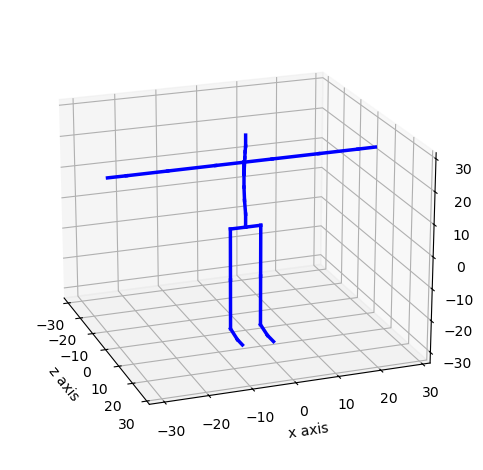

In [27]:
import matplotlib.pyplot as plt

rest_pose = bvhtest.get_rest_pose(mode='coordinates')

fig, ax = pybvh.plot.plot_frame(bvhtest, rest_pose)
plt.show()

We can visualize another skeleton for comparison

In [29]:
new_filepath = bvh_folder / 'bvh_test2.bvh'

new_bvh = pybvh.read_bvh_file(new_filepath)
new_bvh

Bvh(nodes=[ROOT Hips, Chest, Chest2, Chest3, Chest4, Neck, Head, RightCollar, RightShoulder, RightElbow, RightWrist, LeftCollar, LeftShoulder, LeftElbow, LeftWrist, RightHip, RightKnee, RightAnkle, RightToe, LeftHip, LeftKnee, LeftAnkle, LeftToe], frames=array(shape=(61, 72), dtype=float64), frame_frequency=0.008333)

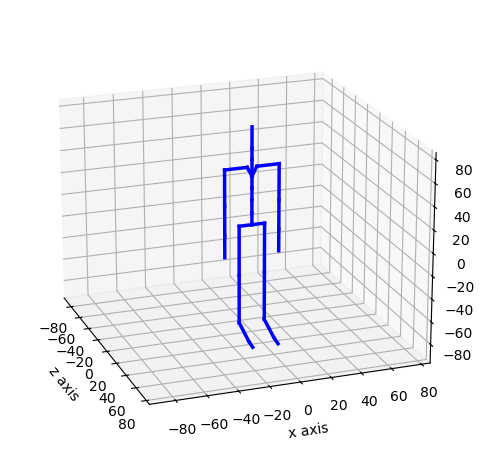

In [30]:
rest_pose = new_bvh.get_rest_pose(mode='coordinates')

fig, ax = pybvh.plot.plot_frame(new_bvh, rest_pose)
plt.show()

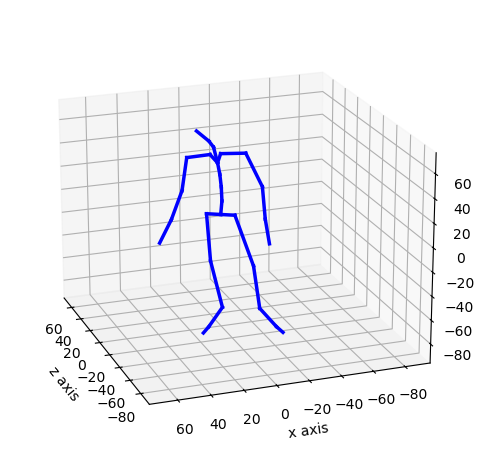

In [31]:
frame = new_bvh.get_spatial_coord(frame_num=5)

fig, ax = pybvh.plot.plot_frame(new_bvh, frame)
plt.show()

### Plotting the bvh animation

Coming...